In [1]:
import nltk
import spacy

nltk.downloader.download('maxent_ne_chunker')
nltk.downloader.download('words')
nltk.downloader.download('treebank')
nltk.downloader.download('maxent_treebank_pos_tagger')
nltk.downloader.download('punkt')
!python -m spacy download en_core_web_sm


[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     C:\Users\rangsarid.p\AppData\Roaming\nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\rangsarid.p\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package treebank to
[nltk_data]     C:\Users\rangsarid.p\AppData\Roaming\nltk_data...
[nltk_data]   Package treebank is already up-to-date!
[nltk_data] Downloading package maxent_treebank_pos_tagger to
[nltk_data]     C:\Users\rangsarid.p\AppData\Roaming\nltk_data...
[nltk_data]   Package maxent_treebank_pos_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\rangsarid.p\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


[+] Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')


In [2]:
import en_core_web_sm
nlp = en_core_web_sm.load()
import locationtagger


In [3]:
import nltk
import numpy as np
import pandas as pd
from nltk.tokenize import word_tokenize
import re

import nltk
import spacy


regex = re.compile('[^a-zA-Z]')
#First parameter is the replacement, second parameter is your input string
#regex.sub('', 'ab3d*E')
#Out: 'abdE'

In [4]:
## File raeding 
location_clean = 'C:\\Users\\rangsarid.p\\Desktop\\python_code\\all_follower_rev3.csv'
location_clean_contri = 'C:\\Users\\rangsarid.p\\Desktop\\python_code\\Contributor_Location.csv'
df = pd.read_csv(location_clean) ###
df1 =  pd.read_csv(location_clean_contri)
#df1 = df[df['Follwer_location'].notnull()]
#df1[df1['Follwer_location'].str.contains('WA')].iloc[1000:20000,:]

C:\Users\rangsarid.p\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
df1['Follwer_location'] = df1['Location'] ### contributor
df ## follower

,Contributor,Follower,Follwer_location,repo
0,Manfred Moser,chazz,NaN,NaN
1,Christian Clauss,Mahmood HB,NaN,dagster
2,Christian Clauss,Mahmood HB,NaN,NaN
3,Alibaba OSS,zhangjianyu,NaN,NaN
4,Justine Tunney,Aditya Nur Rohman,NaN,NaN
...,...,...,...,...
557648,Takahiko Ito,Ryuichiro Hataya,Tokyo,NaN
557649,Takahiko Ito,Yusuke Minami,Singapore,NaN
557650,Takahiko Ito,Koichi Nakata,Tokyo Japan,NaN
557651,Takahiko Ito,Kazuyuki Hashimoto,Tokyo,NaN


In [6]:
### FOllower 

for i in range(len(df)):
    
    location = str(df.loc[i]["Follwer_location"]).split(',')
    country = location[-1]
    if country in [" Beijing",'BJ','bj' ,'Bj'," Xiamen ", " Xi'an", " Xi'an China", " China", 
    " xuhui shanghai", " Shenzhen", " China ", " Beijing China", " anhui", 
    " wuhan hubei", " Beijing Zhongguancun BeiYitiao Road No.15", "Beijing",
    "hangzhou， zhejiang", "China", "ShangHai", "shenzhen","shanghai.China",
    "深圳", "中国广州", "深圳", "愛知県", "北京", "杭州", "ShangHai", "shenzhen",
    "Shanghai", "chengdu", "CHINA", "Guangzhou", " Nevada", "BeiJing", " Zhejiang CN",
    " ShangHai", " Zhejiang CN", " China  ", " China Shandong", " China/Dalian", " HangZhou"
    " HangZhou China", " HangZhou China"," HangZhou China ", " Hangzhou", " HangZhou", "  HangZhou. China",
    "China 100081", " Shanghai", " Harbin Institute of Technology.", " 1000 Chenhui Road", "P.R.China","alibaba",
    "Alibaba AI Labs(Hangzhou)", " CN", "AnHui", "AnHui", "Anhui hefei", "anhui province", "Anhui Province China ",
    "Hefei", "Anhui.Ma'An Shan", "AnHui，HeFei", "Anhui Hefei", "Anhui", "Anhui province", "✈+Shanghai", "地球", "地狱之门",
    "北上广", "Annecy", "Annecy (FR)", "北京市", "北京市丰台区", "京 中关村", "北京市东城区", "北京市海淀区", "北京市海淀区 北京邮电大学",
    "北京市海淀区中关村北京大学", "北京市海淀区上地七街数字传媒", "京市海淀区新街口外大街19号", "京市朝阳区四惠东华腾世纪产业园", "北京市朝阳区将抬",
    "北京市朝阳区平乐园100号", "北京市朝阳区望京soho t3", "北京市朝阳区北苑媒体区天畅园C2-1606", "北京市朝阳区北辰", "北京市通州区玉带河东街4号安莱大厦A座4层102",
    "北京中关村", "北京东城区", "北京昌平", "北京海淀", "北京海淀区", "北京-海淀区", "北京海淀区上地三街", "北京海淀区西二旗", "北京海淀区滴滴大厦", "北京朝阳",
    "京-朝阳", "北京朝阳新华大厦4楼", "北京朝阳区", "北京朝阳育慧路世纪宝鼎", "北京研发中心","北京顺义", "北京邮电大学", "北京雍和宫歌华大厦","北京-通州", "北京酒仙桥国际电子总部",
    "北京，中国", "北京，朝阳", "人间", "北京  ⇋  南京", " 中国", "北京 中国", "北京 海淀", "北京 朝阳", "北京 五道口", "北京 Beijing", "西城", "北京(Bei Jing)",
    " China)", "北京 中关村", "即将搬往望京", "北京市海淀区新街口外大街19号", "北京市朝阳区", "北京市朝阳区四惠东华腾世纪产业园", "北京-朝阳", "地球 ", "北京 海淀", "北京(beijing)",
    "北京 中关村", "北京 海淀", "Asia/Shanghai", "Asia/Shanghai", "Asia China shanghai", "Asia.Beijing", "厦门", "厦门 深圳", "厦门 福建 中国", "厦门大学，CHINA", "baijing",
    " Maryland", " Maryland USA", " MD United States", " MD USA", "Asia/Beijing", "Asia/Chengdu", "Baoding", "beijing", "Bei jin", "Bei jing", "beijing", "beibeijing china",
    "Beiijing China", "beijin", "Bei Jing", "BaoDing", "BEIJING", "BeiJin"]:
        df.loc[i]["Follwer_location"] = "China"
    elif country in ["United States",'seattle','Seattle', " United States", "Denver", "United States", "USA", "San Francisco", " USA",
    "San Francisco Bay Area", " US", "US", "usa", "Illinois", "Los Angeles", " San Francisco", "95033 USA", " California 94107",
    " Texas (Dallas)", " TX",  " TX.", "TX", " Ohio", "Ohio", " OH", "OH", "Alabama", "Alabama USA", "Albany", " NY", "New York",
    " NY 10005", " NYC", "Albany / NYC", "Albany ny", "Albany NY", " New York", "NY", " New York Area", "Oregon", " VA", " MN", " LA",
    " united states", " OR", " NM USA", " Virginia", " MG", " IN", " BC", " British Columbia", "Oklahoma", "almost nevada", " GA", "GA",
    "Altanta", " Ca.", "Amarica", "American", "America - Neotropic", "America/New_York", " Utah", " IA", " Iowa", "Amherst", " Massachusetts",
    "America", "Americana - SP", "Amherst MA", "Ames","Americas", " PA", " FL", " GA", " Georgia", " Michigan USA", "Ann Arbor", "Ann Arbor MI",
    "Ann Arbor Michigan", " MI", "MI", " MI USA", " Michigan", " U.S.A", "Auburn", " georgia", " Georgia USA", " USA.", " GA USA", " Washington DC",
    " GA (USA)", " Ga", "Atlanta Georgia", "Atlanta GA USA", "Atlanta GA", "Atlanta area", "Atlanta | Georgia", "Atlanta - Toronto", "Atlanta ",
    "ATL", "Arizona", "Arizona USA", "Arkansas", " United States of America", "Arlington", "Arlington VA", " Texas", " Tx", "Texas", "Virginia",
    "Arlington.VA.USA", "Asheville NC", " NC", "Atlanta", "Atlanta USA", " GA.", " Georgia ", "GA", "Atlanta. USA", "Atlanta-GA", " AL", " Alabama",
    " California", "Austin TX", " TEXAS", " Texas ", " Texas USA",  " tx", " TX USA", "Tx", "Tx.", "Austin/Houston", "Austin-TX", "Austin", "austin",
    "Bakersfield", "Bakersfield Ca", "Austin Texas", "Austin ", "Austin / San Francisco", "Austin and Salt Lake City", "Austin Texas", "Austin Texas USA",
    "austin tx", "Austin Tx", " Oregon", "atlanta", " Maine", " New Jersey" ]:
        df.loc[i]["Follwer_location"] = "America"
    elif country in ["London", " UK", " England", "United Kingdom", "UK", " Los Angeles", "Aberdour UK", "Alcester", "✈ London", " United Kingdom"]:
        df.loc[i]["Follwer_location"] = "United kingdom"
    elif country in [" Egypt", " Egypt.", "Alexandria VA", "Alexandria Egypt", "Egypt", "Alexandria", "Alexandria "]:
        df.loc[i]["Follwer_location"] = "Egypt"
    elif country in [" Japan", "Japan", "Tokyo", "Tokyo Japan", "japan tokyo", "Japan Tokyo",
    "Tokyo/Japan", "  Japan", "Osaka", "Toyama", "Japan / Tokyo", "日本", " Tokyo", " JAPAN",
    "Shinjuku", " japan", "Kyoto", "Japannnn", "TOKYO", "Land of the Rising Sun", " Japan.",
    "Aichi", "Akihabara", "Asia/Tokyo", "Asia/Kyoto"] :
        df.loc[i]["Follwer_location"] = "Japan"
    elif country in [" India", "Srinagar Kashmir J&K", "India", " bihar india", "Andhra Pradesh", " India.", " INDIA",
    "Ahmedabad", "Agra", "Ahemdabad", "india", " GJ", "ahmedabad gujarat india", " Guajarat", " INDIA", "ahmedabad",
    " Gujarat", "Ahmadabad", " India ", " gujarat", "Ahemedabad", " Kolkata.", "Allahabad", " india", " INDIA - 380001",
    "Gujarat", "India.", "karnataka", " Rajasthan.", "AkashA", "Aligarh", "Allahabad", "Allahabad India", "allahabad", "ALIGARH",
    "Ahmeadabad", "Ambala", "Amritsar", "Alappuzha", "GUJARAT", "Andheri", "Assam", "attingal", "Baidyabati", "Odisha", "Bangalore",
    "BANGALORE", "Maharashtra", "Aurangabad", "Bangaloore", "bangalore", "Bangalore " , "Bangalore - India.", "Bangalore India"," IND",
    "Bangalore- Karnataka - India", "bangalore ", "Bangalore (India)", " Chennai", " India [ #dkannan on irc ]", " India  ",
    "bangalore india", "Bangalore Karnataka India", "bangeluru", "Bangaluru", " Karnataka", "Bangalore.", " Karnataka", "Bangalore.India",
    "Bangalore(IN)", "Bangalore (IN)", "Bangalore / India", "angalore / Jaipur", "Bangalore / Karnataka / India ", "bangalore India", "Banglore",
    "anglore India", "Banglore Karnataka", "Karnataka", "Banglaore", "banglore", "BANGLORE", "Banglore India"]:
        df.loc[i]["Follwer_location"] = "India"
    elif country in [" Bangladesh", " Bangaldesh", "  Bangladesh", "Bangladesh", " Dhaka", "Dhaka", "bangladesh", "Bangladesh", "bangladesh ",
    "Bangladash", "Comilla", "Chittagong"]:
        df.loc[i]["Follwer_location"] = "Bangladesh"
    elif country in [" New Zealand", "Auckland", "Auckland ", "Auckland New Zealand", "Auckland NZ", " New Zealand.", " NewZealand", " NZ", "NZ",
    "Auckland Newzealand", " Nz"]:
        df.loc[i]["Follwer_location"] = "New Zealand"
    elif country in [" Portugal", "Avalon", "Aveiro"]:
        df.loc[i]["Follwer_location"] = "Portugal"
    elif country in [" Azerbaijan", "Baku", "Baku AZ", "Baku Azerbaijan", "  Azerbaijan", "Azerbaijan", "Azerbaijan", "Azerbaijan Baku", " Baku"]:
        df.loc[i]["Follwer_location"] = "Azerbaijan"
    elif country in ["AUSTRALIA", "Australia", "Australia", "australia", " Melbourne", " Gold Coast", " Brisbane", " Brisbane", "Australia Melbourne",
    "Australia / Melbourne", " near Sydney", " Sydney", "Australia "]:
        df.loc[i]["Follwer_location"] = "Australia"
    elif country in ["Armenia11y", "Yerevan", " Yerevan", "Armenia Yerevan", "Armenia Quindío Colombia", "Armenia"]:
        df.loc[i]["Follwer_location"] = "Armenia"
    elif country in ["Greece", "Athens/Greece", " Greece", "Athens", "Athens / Greece", "Athens Greece", " GR", " greece"]:
        df.loc[i]["Follwer_location"] = "Greece"
    elif country in [" Spain", " Catalonia", "Alicante", "Alicante (Spain)", "alcala de henares", "Alcalá de Henares (Madrid)", "alcoi ", "Bacelona",
    " Madrid", " Catalunya", "Barcelona Spain", "Barcelona ", "Barcelona (Spain)", "Barcelona", "barcelona", "BARCELONA", " spain", "Barakaldo",
    "Barakaldo City", " SPAIN", "Spain", " españa"]:
        df.loc[i]["Follwer_location"] = "Spain"
    elif country in [" Nepal", " Kathmandu"]:
        df.loc[i]["Follwer_location"] = "Nepal"
    elif country in [" Bari", " Italy", "Bari - Italy", "Bari"]:
        df.loc[i]["Follwer_location"] = "Italy"
    elif country in [" Indonesia", "Bali", "Bali - Indonesia", " ID", "bandung"]:
        df.loc[i]["Follwer_location"] = "Indonesia"
    elif country in ["Bahrain", " Manama"]:
        df.loc[i]["Follwer_location"] = "Bahrain"
    elif country in [" Colombia", "Barranquilla Colombia", "Barranquilla - Colombia"]:
        df.loc[i]["Follwer_location"] = "Colombia"
    elif country in [" Iraq", "baghdad", "Baghdad; Babylon", "Bandung", "Bandung/Jakarta - Indonesia", "Bandung Indonesia", " IRAQ"]:
        df.loc[i]["Follwer_location"] = "Iraq"
    elif country in ["Algeria", "Algeria Algiers", " Blida", "Algeria Algiers", " Algiers", " El kala", "Tiaret", " Tlemcen", "Algerie",
    "Algerie / Mostaganem / Mazagran", "Algeries", " Algeria.", "Algeria", "Algiers", "algeria", " Tiaret", " Algeria", "Algeria ",
    "Algiers ", " Algeria", "algerai", "Algérie", "Algérie"]:
        df.loc[i]["Follwer_location"] = "Algeria"
    elif country in [" Stockholm", "Örebro", " Sweden", "Anviken-Jämtland-Sweden"]:
        df.loc[i]["Follwer_location"] = "Sweden"
    elif country in [" Germany", "Aachen", "Aachen (Germany)", " German", "Nuremberg", "Albstadt", "Aachen Germany", " Berlin","Berlin"]:
        df.loc[i]["Follwer_location"]= "Germany"
    elif country in [" Australia", " South Australia", " South Australia  ヤシ", "Adelaide", " AU",
    " South Australia ", "SA", " SA"]:
        df.loc[i]["Follwer_location"] = "Australia"
    elif country in [" Netherlands", " NL", " NL ", "NL", " The Netherlands", "AMOY", "amoy", "Amoy / Nederlands", "AMS",
    "Amstelveen", "Amsterdam", "Amoy", "Amoy ", "Amersfoort Netherlands", "Amsterdam { The Netherlands}", "Amsterdam / Netherlands",
    "Amsterdam | NL", "Amsterdam and Utrecht", "Amsterdam area", "msterdam dienstverleners e.u.", "Amsterdam Netherlands", "Amsterdam NL",
    "Amsterdam NL / Melbourne AU", " Amsterdam", " Holland", " Nederland", " Netherland", "Amsterdam ", "Amsterdam - Cape Town", "Amsterdam - NL",
    "Amsterdam - The Netherlands", "Amsterdam (Netherlands)", "Amsterdam (NL)", "Amsterdam | Netherlands", "amsterdam", "Almelo Netherlands",
    "Amsterdam dienstverleners e.u.", " Netherlands ", " The Neatherlands", " the Netherlands", " The Netherlands ", " The Netherlands.", " the netherlands",
    "Amsterdam/Netherlands"]:
        df.loc[i]["Follwer_location"] = "Netherlands"
    elif country in ["Ethiopia", " Ethiopia", "Addis Ababa", "Ethipia"]:
        df.loc[i]["Follwer_location"] = "Ethiopia"
    elif country in [" Denmark ", " Denmark", "Aalborg"]:
        df.loc[i]["Follwer_location"] = "Denmark"
    elif country in [" Iran "]:
        df.loc[i]["Follwer_location"] = "Iran"
    elif country in [" Belgium", "Antwerpen", "Antwerp", "Antwerp (BE)", "Antwerp Belgium", " Belgium."]:
        df.loc[i]["Follwer_location"] = "Belgium"
    elif country in [" Kazakhstan", " Kazakshtan", "Almaty", " Kazakstan", " Qazaqstan", "Almaty/Kazakhstan", "Almaty ", "almaty", " KZ", "Almaty/Kazakhstan"]:
        df.loc[i]["Follwer_location"] = "Kazakhstan"
    elif country in [" Wales", "Aberystwyth"]:
        df.loc[i]["Follwer_location"] = "Wales"
    elif country in [" Porirua"]:
        df.loc[i]["Follwer_location"] = "New Zealand"
    elif country in ["Thailand", " Thailand", "Phuket Thailand", "Thailand ", "Thailand."]:
        df.loc[i]["Follwer_location"] = "Thailand"
    elif country in [" Asuncion - Paraguay"]:
        df.loc[i]["Follwer_location"] = "Paraguay"
    elif country in [" Switzerland", "Basel", "Basel and Lugano", "Basel/Zurich"]:
        df.loc[i]["Follwer_location"] = "Switzerland"
    elif country in ["Amarante | PI | Brazil", "Brazil", " Brazil", " brazil", " Brazil", "Amparo SP", " SP - Brazil", "Araras/SP","Aracaju",
    "Aracaju - Brazil", "Aracaju - SE", "Aracaju - SE - BR", "Aracaju - Sergipe", "Aracaju - Sergipe - Brasil", " Sergipe", "Bahia - Brasil", "Bahia - Brazil'",
    "Bahrain "]:
        df.loc[i]["Follwer_location"] = "Brazil"
    elif country in [" Perú", " Peru", " perú"]:
        df.loc[i]["Follwer_location"] = "Peru"
    elif country in ["Singapore", " Singapore 118265", "Singapore "]:
        df.loc[i]["Follwer_location"] = "Singapore"
    elif country in [" Republic of Korea ", " Korea", "Korea", " Republic of Korea", " 대한민국", " South Korea", "'Asia/Seoul", "at Seoul"]:
        df.loc[i]["Follwer_location"] = "Korea"
    elif country in [" Vietnam", "Ha Noi", "Viet Nam", " Việt Nam", " Viet Nam"]:
        df.loc[i]["Follwer_location"] = "Vietnam"
    elif country in [" CA ", " CA", " Vancouver", " Québec", "Alberta", " Canada", " ca", "B.C. Canada"]:
        df.loc[i]["Follwer_location"] = "Canada"
    elif country in [" indonesia"]:
        df.loc[i]["Follwer_location"] = "Indonesia"
    elif country in [" France",'Paris','paris', " France ", " FRANCE", "Albi", "Amiens", "Amiens (France)", " Paris", "Alsace", "Alsace / France"]:
        df.loc[i]["Follwer_location"] = "France"
    elif country in [" Morocco"]:
        df.loc[i]["Follwer_location"] = "Morocco"
    elif country in [" Pakistan", "abbotabad", " pakistan"]:
        df.loc[i]["Follwer_location"] = "Pakistan"
    elif country in [" Slovakia ", " Slovakia"]:
        df.loc[i]["Follwer_location"] = "Slovakia"
    elif country in [" Saudi Arabia ", " Saudi Arabia"]:
        df.loc[i]["Follwer_location"] = "Saudi Arabia"
    elif country in ["Baltimore", " MD", "Baltimore MD", " MD"]:
        df.loc[i]["Follwer_location"] = "Baltimore"
    elif country in [" Brasil"]:
        df.loc[i]["Follwer_location"] = "Brazil"
    elif country in [" Scotland", " Scotland."]:
        df.loc[i]["Follwer_location"] = "Scotland"
    elif country in [" Cote d'ivoire ", " Côte d'Ivoire", "Abidjan Cote d'Ivoire"]:
        df.loc[i]["Follwer_location"] = "Cote d'ivoire"
    elif country in [" Egypt "," Egypt", "Alexandria_Egypt", "Alexandria. Egypt", "Aleandria-Egypt", "Aleandria-Egypt"]:
        df.loc[i]["Follwer_location"] = "Egypt"
    elif country in [" BERLIN", "Ain't Petersburg",'Moscow']:
        df.loc[i]["Follwer_location"] = "Russia"
    elif country in [" Turkey", "Adana", "Adana/TURKEY ", "Adıyaman", "Aksaray", "Ankara", "Ankara - TURKEY", "Ankara - Turkey",
    "Ankara / TURKEY", "ANKARA / TURKEY", "Ankara / Turkey", " TR", " TURKEY", " turkey", "Turkey", "Ankara/TÜRKİYE", "ankara/Turkey",
    "Ankara/Turkey", "Ankara/TURKEY", "ANKARA", "Ankara / Turkiye", "Ankara Turkey", "Ankara-Turkey", "Antalya", "Antalya - Turkey",
    "Antalya / Tukey",'Mosco']:
        df.loc[i]["Follwer_location"] = "Turkey"
    elif country in [" Afghanistan", "Afghanistan", "afghanistan"]:
        df.loc[i]["Follwer_location"] = "Afghanistan"
    elif country in ["A Coruña (Spain)", "A Coruña (Galiza)", " España", "  Spain", "Almendralejo", "Almería", "Almere",
    "Almeria", " Milan", "Almería (Spain)"]:
        df.loc[i]["Follwer_location"] = "Spain"
    elif country in [" Czech Republic ", " Czech Republic"]:
        df.loc[i]["Follwer_location"] = "Czech"
    elif country in ["Alaska", "Anchorage", "Anchorage Alaska", " AK", " Alaska"]:
        df.loc[i]["Follwer_location"] = "Alaska"
    elif country in ["Amman", "Amman - Jordan", " Jordan", "Amman- Jordan ", "Jordan", "Amman Jordan", "jordan ", "Amman/Jordan","Amman-Jordan"]:
        df.loc[i]["Follwer_location"] = "Jordan"
    elif country in ["Asunción - Paraguay"," Paraguay", " PY"]:
        df.loc[i]["Follwer_location"] = "Paraguay"
    elif country in [" MA", " México.", "aguascalientes", " México", " Mexico", "Albuquerque New Mexico", "Albuquerque NM",
    " New Mexico", " NM", "Baja California Tijuana mexico", " Mexico "]:
        df.loc[i]["Follwer_location"] = "Mexico"
    elif country in ["Abu-Dhabi", " U.A.E" "Abu Dhabi", "Abu Dhabi UAE", " United Arab Emirates", "Abu Dhubi  U.A.E",
    "AbuDhabi", "Abu-Dhabi/UAE", "Abu Dhabi", " U.A.E", " UAE"]:
        df.loc[i]["Follwer_location"] = "United Arab Emirates"
    elif country in [" Nigeria", "Nigeria", "Abuja.Nigeria", "Abuja Nigeria", "Abuja Lagos", "Abuja and Kano", " NG",
    " Nigeria ", " Nigeria.", "Abuja", "abuja Nigeria", "  Nigeria", " FCT - Nigeria.", "ajah lagos"]:
        df.loc[i]["Follwer_location"] = "Nigeria"
    elif country in ["Ghana", " Ghana.", " Ghana", "Accra Ghana", "Accra", "Accra/Ghana"]:
        df.loc[i]["Follwer_location"] = "Ghana"
    elif country in [" Johannesburg", "Africa"]:
        df.loc[i]["Follwer_location"] = "Africa"
    elif country is None or country == 'nan':
        pass
    else:
        df.loc[i]["Follwer_location"] = country.strip()  
print("Done")

Done


In [11]:
df

,Contributor,Follower,Follwer_location,repo
151,Wei Zhu,木鸢,China,elasticsearch-definitive-guide
206,Florian Roth,sud01oo,Afghan,NaN
207,Aly Sivji,Mohammed Dawood,Egypt,elasticsearch-py
208,Grégoire Pineau,ilyass,Spain,elasticsearch-logstash-index-mgmt
209,Di Wu,jihaibo,China,elasticsearch-jdbc
...,...,...,...,...
557648,Takahiko Ito,Ryuichiro Hataya,Japan,NaN
557649,Takahiko Ito,Yusuke Minami,Singapore,NaN
557650,Takahiko Ito,Koichi Nakata,Japan,NaN
557651,Takahiko Ito,Kazuyuki Hashimoto,Japan,NaN


In [7]:
#### contributor 
for i in range(len(df1)):
    
    location = str(df1.loc[i]["Follwer_location"]).split(',')
    country = location[-1]
    if country in [" Beijing",'BJ','bj' ,'Bj'," Xiamen ", " Xi'an", " Xi'an China", " China", 
    " xuhui shanghai", " Shenzhen", " China ", " Beijing China", " anhui", 
    " wuhan hubei", " Beijing Zhongguancun BeiYitiao Road No.15", "Beijing",
    "hangzhou， zhejiang", "China", "ShangHai", "shenzhen","shanghai.China",
    "深圳", "中国广州", "深圳", "愛知県", "北京", "杭州", "ShangHai", "shenzhen",
    "Shanghai", "chengdu", "CHINA", "Guangzhou", " Nevada", "BeiJing", " Zhejiang CN",
    " ShangHai", " Zhejiang CN", " China  ", " China Shandong", " China/Dalian", " HangZhou"
    " HangZhou China", " HangZhou China"," HangZhou China ", " Hangzhou", " HangZhou", "  HangZhou. China",
    "China 100081", " Shanghai", " Harbin Institute of Technology.", " 1000 Chenhui Road", "P.R.China","alibaba",
    "Alibaba AI Labs(Hangzhou)", " CN", "AnHui", "AnHui", "Anhui hefei", "anhui province", "Anhui Province China ",
    "Hefei", "Anhui.Ma'An Shan", "AnHui，HeFei", "Anhui Hefei", "Anhui", "Anhui province", "✈+Shanghai", "地球", "地狱之门",
    "北上广", "Annecy", "Annecy (FR)", "北京市", "北京市丰台区", "京 中关村", "北京市东城区", "北京市海淀区", "北京市海淀区 北京邮电大学",
    "北京市海淀区中关村北京大学", "北京市海淀区上地七街数字传媒", "京市海淀区新街口外大街19号", "京市朝阳区四惠东华腾世纪产业园", "北京市朝阳区将抬",
    "北京市朝阳区平乐园100号", "北京市朝阳区望京soho t3", "北京市朝阳区北苑媒体区天畅园C2-1606", "北京市朝阳区北辰", "北京市通州区玉带河东街4号安莱大厦A座4层102",
    "北京中关村", "北京东城区", "北京昌平", "北京海淀", "北京海淀区", "北京-海淀区", "北京海淀区上地三街", "北京海淀区西二旗", "北京海淀区滴滴大厦", "北京朝阳",
    "京-朝阳", "北京朝阳新华大厦4楼", "北京朝阳区", "北京朝阳育慧路世纪宝鼎", "北京研发中心","北京顺义", "北京邮电大学", "北京雍和宫歌华大厦","北京-通州", "北京酒仙桥国际电子总部",
    "北京，中国", "北京，朝阳", "人间", "北京  ⇋  南京", " 中国", "北京 中国", "北京 海淀", "北京 朝阳", "北京 五道口", "北京 Beijing", "西城", "北京(Bei Jing)",
    " China)", "北京 中关村", "即将搬往望京", "北京市海淀区新街口外大街19号", "北京市朝阳区", "北京市朝阳区四惠东华腾世纪产业园", "北京-朝阳", "地球 ", "北京 海淀", "北京(beijing)",
    "北京 中关村", "北京 海淀", "Asia/Shanghai", "Asia/Shanghai", "Asia China shanghai", "Asia.Beijing", "厦门", "厦门 深圳", "厦门 福建 中国", "厦门大学，CHINA", "baijing",
    " Maryland", " Maryland USA", " MD United States", " MD USA", "Asia/Beijing", "Asia/Chengdu", "Baoding", "beijing", "Bei jin", "Bei jing", "beijing", "beibeijing china",
    "Beiijing China", "beijin", "Bei Jing", "BaoDing", "BEIJING", "BeiJin"]:
        df1.loc[i]["Follwer_location"] = "China"
    elif country in ["United States",'seattle','Seattle', " United States", "Denver", "United States", "USA", "San Francisco", " USA",
    "San Francisco Bay Area", " US", "US", "usa", "Illinois", "Los Angeles", " San Francisco", "95033 USA", " California 94107",
    " Texas (Dallas)", " TX",  " TX.", "TX", " Ohio", "Ohio", " OH", "OH", "Alabama", "Alabama USA", "Albany", " NY", "New York",
    " NY 10005", " NYC", "Albany / NYC", "Albany ny", "Albany NY", " New York", "NY", " New York Area", "Oregon", " VA", " MN", " LA",
    " united states", " OR", " NM USA", " Virginia", " MG", " IN", " BC", " British Columbia", "Oklahoma", "almost nevada", " GA", "GA",
    "Altanta", " Ca.", "Amarica", "American", "America - Neotropic", "America/New_York", " Utah", " IA", " Iowa", "Amherst", " Massachusetts",
    "America", "Americana - SP", "Amherst MA", "Ames","Americas", " PA", " FL", " GA", " Georgia", " Michigan USA", "Ann Arbor", "Ann Arbor MI",
    "Ann Arbor Michigan", " MI", "MI", " MI USA", " Michigan", " U.S.A", "Auburn", " georgia", " Georgia USA", " USA.", " GA USA", " Washington DC",
    " GA (USA)", " Ga", "Atlanta Georgia", "Atlanta GA USA", "Atlanta GA", "Atlanta area", "Atlanta | Georgia", "Atlanta - Toronto", "Atlanta ",
    "ATL", "Arizona", "Arizona USA", "Arkansas", " United States of America", "Arlington", "Arlington VA", " Texas", " Tx", "Texas", "Virginia",
    "Arlington.VA.USA", "Asheville NC", " NC", "Atlanta", "Atlanta USA", " GA.", " Georgia ", "GA", "Atlanta. USA", "Atlanta-GA", " AL", " Alabama",
    " California", "Austin TX", " TEXAS", " Texas ", " Texas USA",  " tx", " TX USA", "Tx", "Tx.", "Austin/Houston", "Austin-TX", "Austin", "austin",
    "Bakersfield", "Bakersfield Ca", "Austin Texas", "Austin ", "Austin / San Francisco", "Austin and Salt Lake City", "Austin Texas", "Austin Texas USA",
    "austin tx", "Austin Tx", " Oregon", "atlanta", " Maine", " New Jersey" ]:
        df1.loc[i]["Follwer_location"] = "America"
    elif country in ["London", " UK", " England", "United Kingdom", "UK", " Los Angeles", "Aberdour UK", "Alcester", "✈ London", " United Kingdom"]:
        df1.loc[i]["Follwer_location"] = "United kingdom"
    elif country in [" Egypt", " Egypt.", "Alexandria VA", "Alexandria Egypt", "Egypt", "Alexandria", "Alexandria "]:
        df1.loc[i]["Follwer_location"] = "Egypt"
    elif country in [" Japan", "Japan", "Tokyo", "Tokyo Japan", "japan tokyo", "Japan Tokyo",
    "Tokyo/Japan", "  Japan", "Osaka", "Toyama", "Japan / Tokyo", "日本", " Tokyo", " JAPAN",
    "Shinjuku", " japan", "Kyoto", "Japannnn", "TOKYO", "Land of the Rising Sun", " Japan.",
    "Aichi", "Akihabara", "Asia/Tokyo", "Asia/Kyoto"] :
        df1.loc[i]["Follwer_location"] = "Japan"
    elif country in [" India", "Srinagar Kashmir J&K", "India", " bihar india", "Andhra Pradesh", " India.", " INDIA",
    "Ahmedabad", "Agra", "Ahemdabad", "india", " GJ", "ahmedabad gujarat india", " Guajarat", " INDIA", "ahmedabad",
    " Gujarat", "Ahmadabad", " India ", " gujarat", "Ahemedabad", " Kolkata.", "Allahabad", " india", " INDIA - 380001",
    "Gujarat", "India.", "karnataka", " Rajasthan.", "AkashA", "Aligarh", "Allahabad", "Allahabad India", "allahabad", "ALIGARH",
    "Ahmeadabad", "Ambala", "Amritsar", "Alappuzha", "GUJARAT", "Andheri", "Assam", "attingal", "Baidyabati", "Odisha", "Bangalore",
    "BANGALORE", "Maharashtra", "Aurangabad", "Bangaloore", "bangalore", "Bangalore " , "Bangalore - India.", "Bangalore India"," IND",
    "Bangalore- Karnataka - India", "bangalore ", "Bangalore (India)", " Chennai", " India [ #dkannan on irc ]", " India  ",
    "bangalore india", "Bangalore Karnataka India", "bangeluru", "Bangaluru", " Karnataka", "Bangalore.", " Karnataka", "Bangalore.India",
    "Bangalore(IN)", "Bangalore (IN)", "Bangalore / India", "angalore / Jaipur", "Bangalore / Karnataka / India ", "bangalore India", "Banglore",
    "anglore India", "Banglore Karnataka", "Karnataka", "Banglaore", "banglore", "BANGLORE", "Banglore India"]:
        df1.loc[i]["Follwer_location"] = "India"
    elif country in [" Bangladesh", " Bangaldesh", "  Bangladesh", "Bangladesh", " Dhaka", "Dhaka", "bangladesh", "Bangladesh", "bangladesh ",
    "Bangladash", "Comilla", "Chittagong"]:
        df1.loc[i]["Follwer_location"] = "Bangladesh"
    elif country in [" New Zealand", "Auckland", "Auckland ", "Auckland New Zealand", "Auckland NZ", " New Zealand.", " NewZealand", " NZ", "NZ",
    "Auckland Newzealand", " Nz"]:
        df1.loc[i]["Follwer_location"] = "New Zealand"
    elif country in [" Portugal", "Avalon", "Aveiro"]:
        df1.loc[i]["Follwer_location"] = "Portugal"
    elif country in [" Azerbaijan", "Baku", "Baku AZ", "Baku Azerbaijan", "  Azerbaijan", "Azerbaijan", "Azerbaijan", "Azerbaijan Baku", " Baku"]:
        df1.loc[i]["Follwer_location"] = "Azerbaijan"
    elif country in ["AUSTRALIA", "Australia", "Australia", "australia", " Melbourne", " Gold Coast", " Brisbane", " Brisbane", "Australia Melbourne",
    "Australia / Melbourne", " near Sydney", " Sydney", "Australia "]:
        df1.loc[i]["Follwer_location"] = "Australia"
    elif country in ["Armenia11y", "Yerevan", " Yerevan", "Armenia Yerevan", "Armenia Quindío Colombia", "Armenia"]:
        df1.loc[i]["Follwer_location"] = "Armenia"
    elif country in ["Greece", "Athens/Greece", " Greece", "Athens", "Athens / Greece", "Athens Greece", " GR", " greece"]:
        df1.loc[i]["Follwer_location"] = "Greece"
    elif country in [" Spain", " Catalonia", "Alicante", "Alicante (Spain)", "alcala de henares", "Alcalá de Henares (Madrid)", "alcoi ", "Bacelona",
    " Madrid", " Catalunya", "Barcelona Spain", "Barcelona ", "Barcelona (Spain)", "Barcelona", "barcelona", "BARCELONA", " spain", "Barakaldo",
    "Barakaldo City", " SPAIN", "Spain", " españa"]:
        df1.loc[i]["Follwer_location"] = "Spain"
    elif country in [" Nepal", " Kathmandu"]:
        df1.loc[i]["Follwer_location"] = "Nepal"
    elif country in [" Bari", " Italy", "Bari - Italy", "Bari"]:
        df1.loc[i]["Follwer_location"] = "Italy"
    elif country in [" Indonesia", "Bali", "Bali - Indonesia", " ID", "bandung"]:
        df1.loc[i]["Follwer_location"] = "Indonesia"
    elif country in ["Bahrain", " Manama"]:
        df1.loc[i]["Follwer_location"] = "Bahrain"
    elif country in [" Colombia", "Barranquilla Colombia", "Barranquilla - Colombia"]:
        df1.loc[i]["Follwer_location"] = "Colombia"
    elif country in [" Iraq", "baghdad", "Baghdad; Babylon", "Bandung", "Bandung/Jakarta - Indonesia", "Bandung Indonesia", " IRAQ"]:
        df1.loc[i]["Follwer_location"] = "Iraq"
    elif country in ["Algeria", "Algeria Algiers", " Blida", "Algeria Algiers", " Algiers", " El kala", "Tiaret", " Tlemcen", "Algerie",
    "Algerie / Mostaganem / Mazagran", "Algeries", " Algeria.", "Algeria", "Algiers", "algeria", " Tiaret", " Algeria", "Algeria ",
    "Algiers ", " Algeria", "algerai", "Algérie", "Algérie"]:
        df1.loc[i]["Follwer_location"] = "Algeria"
    elif country in [" Stockholm", "Örebro", " Sweden", "Anviken-Jämtland-Sweden"]:
        df1.loc[i]["Follwer_location"] = "Sweden"
    elif country in [" Germany", "Aachen", "Aachen (Germany)", " German", "Nuremberg", "Albstadt", "Aachen Germany", " Berlin","Berlin"]:
        df1.loc[i]["Follwer_location"]= "Germany"
    elif country in [" Australia", " South Australia", " South Australia  ヤシ", "Adelaide", " AU",
    " South Australia ", "SA", " SA"]:
        df1.loc[i]["Follwer_location"] = "Australia"
    elif country in [" Netherlands", " NL", " NL ", "NL", " The Netherlands", "AMOY", "amoy", "Amoy / Nederlands", "AMS",
    "Amstelveen", "Amsterdam", "Amoy", "Amoy ", "Amersfoort Netherlands", "Amsterdam { The Netherlands}", "Amsterdam / Netherlands",
    "Amsterdam | NL", "Amsterdam and Utrecht", "Amsterdam area", "msterdam dienstverleners e.u.", "Amsterdam Netherlands", "Amsterdam NL",
    "Amsterdam NL / Melbourne AU", " Amsterdam", " Holland", " Nederland", " Netherland", "Amsterdam ", "Amsterdam - Cape Town", "Amsterdam - NL",
    "Amsterdam - The Netherlands", "Amsterdam (Netherlands)", "Amsterdam (NL)", "Amsterdam | Netherlands", "amsterdam", "Almelo Netherlands",
    "Amsterdam dienstverleners e.u.", " Netherlands ", " The Neatherlands", " the Netherlands", " The Netherlands ", " The Netherlands.", " the netherlands",
    "Amsterdam/Netherlands"]:
        df1.loc[i]["Follwer_location"] = "Netherlands"
    elif country in ["Ethiopia", " Ethiopia", "Addis Ababa", "Ethipia"]:
        df1.loc[i]["Follwer_location"] = "Ethiopia"
    elif country in [" Denmark ", " Denmark", "Aalborg"]:
        df1.loc[i]["Follwer_location"] = "Denmark"
    elif country in [" Iran "]:
        df1.loc[i]["Follwer_location"] = "Iran"
    elif country in [" Belgium", "Antwerpen", "Antwerp", "Antwerp (BE)", "Antwerp Belgium", " Belgium."]:
        df1.loc[i]["Follwer_location"] = "Belgium"
    elif country in [" Kazakhstan", " Kazakshtan", "Almaty", " Kazakstan", " Qazaqstan", "Almaty/Kazakhstan", "Almaty ", "almaty", " KZ", "Almaty/Kazakhstan"]:
        df1.loc[i]["Follwer_location"] = "Kazakhstan"
    elif country in [" Wales", "Aberystwyth"]:
        df1.loc[i]["Follwer_location"] = "Wales"
    elif country in [" Porirua"]:
        df1.loc[i]["Follwer_location"] = "New Zealand"
    elif country in ["Thailand", " Thailand", "Phuket Thailand", "Thailand ", "Thailand."]:
        df1.loc[i]["Follwer_location"] = "Thailand"
    elif country in [" Asuncion - Paraguay"]:
        df1.loc[i]["Follwer_location"] = "Paraguay"
    elif country in [" Switzerland", "Basel", "Basel and Lugano", "Basel/Zurich"]:
        df1.loc[i]["Follwer_location"] = "Switzerland"
    elif country in ["Amarante | PI | Brazil", "Brazil", " Brazil", " brazil", " Brazil", "Amparo SP", " SP - Brazil", "Araras/SP","Aracaju",
    "Aracaju - Brazil", "Aracaju - SE", "Aracaju - SE - BR", "Aracaju - Sergipe", "Aracaju - Sergipe - Brasil", " Sergipe", "Bahia - Brasil", "Bahia - Brazil'",
    "Bahrain "]:
        df1.loc[i]["Follwer_location"] = "Brazil"
    elif country in [" Perú", " Peru", " perú"]:
        df1.loc[i]["Follwer_location"] = "Peru"
    elif country in ["Singapore", " Singapore 118265", "Singapore "]:
        df1.loc[i]["Follwer_location"] = "Singapore"
    elif country in [" Republic of Korea ", " Korea", "Korea", " Republic of Korea", " 대한민국", " South Korea", "'Asia/Seoul", "at Seoul"]:
        df1.loc[i]["Follwer_location"] = "Korea"
    elif country in [" Vietnam", "Ha Noi", "Viet Nam", " Việt Nam", " Viet Nam"]:
        df1.loc[i]["Follwer_location"] = "Vietnam"
    elif country in [" CA ", " CA", " Vancouver", " Québec", "Alberta", " Canada", " ca", "B.C. Canada"]:
        df1.loc[i]["Follwer_location"] = "Canada"
    elif country in [" indonesia"]:
        df1.loc[i]["Follwer_location"] = "Indonesia"
    elif country in [" France",'Paris','paris', " France ", " FRANCE", "Albi", "Amiens", "Amiens (France)", " Paris", "Alsace", "Alsace / France"]:
        df1.loc[i]["Follwer_location"] = "France"
    elif country in [" Morocco"]:
        df1.loc[i]["Follwer_location"] = "Morocco"
    elif country in [" Pakistan", "abbotabad", " pakistan"]:
        df1.loc[i]["Follwer_location"] = "Pakistan"
    elif country in [" Slovakia ", " Slovakia"]:
        df1.loc[i]["Follwer_location"] = "Slovakia"
    elif country in [" Saudi Arabia ", " Saudi Arabia"]:
        df1.loc[i]["Follwer_location"] = "Saudi Arabia"
    elif country in ["Baltimore", " MD", "Baltimore MD", " MD"]:
        df1.loc[i]["Follwer_location"] = "Baltimore"
    elif country in [" Brasil"]:
        df1.loc[i]["Follwer_location"] = "Brazil"
    elif country in [" Scotland", " Scotland."]:
        df1.loc[i]["Follwer_location"] = "Scotland"
    elif country in [" Cote d'ivoire ", " Côte d'Ivoire", "Abidjan Cote d'Ivoire"]:
        df1.loc[i]["Follwer_location"] = "Cote d'ivoire"
    elif country in [" Egypt "," Egypt", "Alexandria_Egypt", "Alexandria. Egypt", "Aleandria-Egypt", "Aleandria-Egypt"]:
        df1.loc[i]["Follwer_location"] = "Egypt"
    elif country in [" BERLIN", "Ain't Petersburg",'Moscow']:
        df1.loc[i]["Follwer_location"] = "Russia"
    elif country in [" Turkey", "Adana", "Adana/TURKEY ", "Adıyaman", "Aksaray", "Ankara", "Ankara - TURKEY", "Ankara - Turkey",
    "Ankara / TURKEY", "ANKARA / TURKEY", "Ankara / Turkey", " TR", " TURKEY", " turkey", "Turkey", "Ankara/TÜRKİYE", "ankara/Turkey",
    "Ankara/Turkey", "Ankara/TURKEY", "ANKARA", "Ankara / Turkiye", "Ankara Turkey", "Ankara-Turkey", "Antalya", "Antalya - Turkey",
    "Antalya / Tukey",'Mosco']:
        df1.loc[i]["Follwer_location"] = "Turkey"
    elif country in [" Afghanistan", "Afghanistan", "afghanistan"]:
        df1.loc[i]["Follwer_location"] = "Afghanistan"
    elif country in ["A Coruña (Spain)", "A Coruña (Galiza)", " España", "  Spain", "Almendralejo", "Almería", "Almere",
    "Almeria", " Milan", "Almería (Spain)"]:
        df1.loc[i]["Follwer_location"] = "Spain"
    elif country in [" Czech Republic ", " Czech Republic"]:
        df1.loc[i]["Follwer_location"] = "Czech"
    elif country in ["Alaska", "Anchorage", "Anchorage Alaska", " AK", " Alaska"]:
        df1.loc[i]["Follwer_location"] = "Alaska"
    elif country in ["Amman", "Amman - Jordan", " Jordan", "Amman- Jordan ", "Jordan", "Amman Jordan", "jordan ", "Amman/Jordan","Amman-Jordan"]:
        df1.loc[i]["Follwer_location"] = "Jordan"
    elif country in ["Asunción - Paraguay"," Paraguay", " PY"]:
        df1.loc[i]["Follwer_location"] = "Paraguay"
    elif country in [" MA", " México.", "aguascalientes", " México", " Mexico", "Albuquerque New Mexico", "Albuquerque NM",
    " New Mexico", " NM", "Baja California Tijuana mexico", " Mexico "]:
        df1.loc[i]["Follwer_location"] = "Mexico"
    elif country in ["Abu-Dhabi", " U.A.E" "Abu Dhabi", "Abu Dhabi UAE", " United Arab Emirates", "Abu Dhubi  U.A.E",
    "AbuDhabi", "Abu-Dhabi/UAE", "Abu Dhabi", " U.A.E", " UAE"]:
        df1.loc[i]["Follwer_location"] = "United Arab Emirates"
    elif country in [" Nigeria", "Nigeria", "Abuja.Nigeria", "Abuja Nigeria", "Abuja Lagos", "Abuja and Kano", " NG",
    " Nigeria ", " Nigeria.", "Abuja", "abuja Nigeria", "  Nigeria", " FCT - Nigeria.", "ajah lagos"]:
        df1.loc[i]["Follwer_location"] = "Nigeria"
    elif country in ["Ghana", " Ghana.", " Ghana", "Accra Ghana", "Accra", "Accra/Ghana"]:
        df1.loc[i]["Follwer_location"] = "Ghana"
    elif country in [" Johannesburg", "Africa"]:
        df1.loc[i]["Follwer_location"] = "Africa"
    elif country is None or country == 'nan':
        pass
    else:
        df1.loc[i]["Follwer_location"] = country.strip()  
print('Done Contributor')

Done Contributor


In [9]:
df[df['Follwer_location']=='America']

,Contributor,Follower,Follwer_location,repo
265,Kashif Rasul,MOHAMMED SAMSUDDIN,America,NaN
359,theduke,Dan Bruder,America,logstash-kafka
360,Valerian Saliou,Dan Bruder,America,sonic
520,Gina Trapani,Kiran Max Weber,America,elasticsearch-jdbc
2428,Andrew Cholakian,Adderall,America,beats
...,...,...,...,...
557506,Ryuichi Ito,Joel Handwell,America,NaN
557548,Jiro Nishiguchi,Daisuke Murase,America,NaN
557577,Jiro Nishiguchi,Chad Granum,America,NaN
557604,Ryu Kobayashi,Nathan Perfetti,America,NaN


In [ ]:
df.to_csv('all_follower_rev5.csv')

In [10]:
### Remove NUll 
df = df[df['Follwer_location'].notnull()]
df1 = df1[df1['Follwer_location'].notnull()]

In [13]:
#df_d['Follwer_location']
df1 =df1.drop_duplicates('Contributor') ### contirbutor
df = df.drop_duplicates(['Contributor','Follower']) ### follower
#for n,i in df.iterrows() :
   # print(i['Follwer_location'])


In [14]:

dic_follower = {}
for n,i in df.iterrows() : 
    if i['Follwer_location'] not in dic_follower :
        dic_follower[i['Follwer_location']] = 1
    else :
        dic_follower[i['Follwer_location']] += 1 
        
dic_follower

{'China': 31057,
 'Afghan': 1,
 'Egypt': 938,
 'Spain': 2953,
 'Paraguay': 176,
 'Available for hire': 1,
 'Bangladesh': 2282,
 'India': 15948,
 'Thailand': 899,
 'Bay Area': 262,
 'Russia': 3378,
 'Czech': 313,
 'America': 34766,
 'Korea': 1878,
 'Brazil': 5591,
 'Colorado Area': 1,
 'Earth (Dimension C-137)': 1,
 'Earth Dimension C-137': 2,
 'Ę̴̛̫̣͉͎̞̻̭̋͆̀͒͐̊̑́̏̃̚ͅr̴̢̡̡̛̦̹͉͇̻̣̩͈̗͒̉͌̿̆̾̐̓̌̕͘r̴̨̢̬͖̱̮͚͙̮̙̥̳̔̏͗̎̓͂̍̈́̊̔̏̔o̴̡̡͓̦͙͉̬̱͚͐̏̌͒͜r̷̨̨͓͓͎̤͗͌̃̌͂͛̉̃̉͋̉̀́͘͜ ̵͎͙̄̕͝4̵̫͖̯̙̙͛͝0̸̛̛͍͖̠̮̠̰̬͛̂̽̿͊͆̇̓̉͒4̵̹͔͍̺̍̄': 1,
 'en la galaxia Láctea': 5,
 'Galaxy': 34,
 'Germany': 9138,
 'Brazil.': 43,
 'CHN': 23,
 'IIT Kharagpur': 26,
 'Indonesia': 1255,
 'Turkey': 1658,
 'Mymensingh.': 4,
 'Afghanistan': 18,
 'Taiwan.': 14,
 'Vietnam': 1643,
 'Laniakea Supercluster': 10,
 'localhost': 402,
 'United kingdom': 10472,
 'Canada': 18190,
 'Lucknow - Bengaluru': 1,
 'France': 6473,
 'Errachidia': 2,
 'Morocco': 311,
 'Mars': 145,
 'Milky Way': 105,
 'Electrical Engineering': 4,
 'Neo Saitama Kingdom': 1,
 'Tai

In [15]:
dic_contributor = {}
for n,i in df1.iterrows() : 
    if i['Follwer_location'] not in dic_contributor :
        dic_contributor[i['Follwer_location']] = 1
    else :
        dic_contributor[i['Follwer_location']] += 1 

In [16]:
dic_contributor.pop('WA')
dic_contributor.pop('Earth')
dic_follower.pop('WA')
dic_follower.pop('Earth')

1716

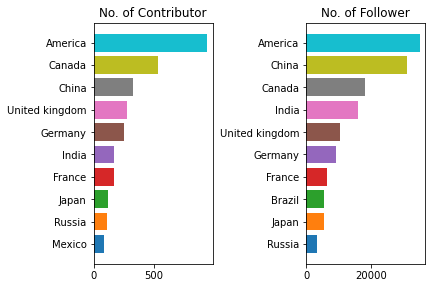

In [64]:
ee_contributor = sorted(dic_contributor.items(), key=lambda x: x[1], reverse=True)[9::-1]
import matplotlib.pyplot as plt
import seaborn as sns

fig, axs = plt.subplots(1,2)
ax0 = plt.subplot(axs[0])
ax1 = plt.subplot(axs[1])
for x,y in ee_contributor :
    ax0.barh(x,y)
ee_follower = sorted(dic_follower.items(), key=lambda x: x[1], reverse=True)[9::-1]
for x,y in ee_follower :
    ax1.barh(x,y)
#ax.barh(xx,yy)
ax0.set_title('No. of Contributor')
ax1.set_title('No. of Follower')
ax2.set_title('Contibutor/Follower')



plt.tight_layout(pad=0.7)
plt.show() 
#plt.savefig('hist2d.jpg', dpi=300,transparent = True)
#ax = sns.barplot(x="tip", y="day", data=tips)

In [ ]:
#res = {key: test_dict2[key] * test_dict1.get(key, 0)  
                     #  for key in test_dict2.keys()} 
from collections import Counter 
       for key in dis_country.items(): 
    print(key)

In [ ]:
ee = sorted(dis_country.items(), key=lambda x: x[1], reverse=True)[55:0:-1]
ee

In [ ]:
dis_country.pop('')

In [ ]:
ee = sorted(dis_country_1.items(), key=lambda x: x[1], reverse=True)[ 0:10]
import matplotlib.pyplot as plt
import seaborn as sns

xx = []
yy = []
fig = plt.figure(figsize=(8, 6))
ax = fig.add_axes([0,0,1,1])

for x,y in ee :
 # xx.append(x)
 # yy.append(y)
    #sns.barplot(x=x, y=y, data=tips)
    #colors = np.random.random((20, 3))
    ax.bar(x,y)
      #ax.set_color_cycle(['c', 'm', 'y', 'k'])

#ax.barh(xx,yy)
plt.xlabel("Number of Contributor")
plt.ylabel("Country")
#plt.title(' Number of Follwer')
#plt.show() 
plt.savefig('hist2d.jpg', dpi=50,transparent = True)
#ax = sns.barplot(x="tip", y="day", data=tips)

In [ ]:
colors = np.random.random((10, 3))
colors

In [ ]:
ee[20:51]

In [ ]:
location_nlp = './github_project\\New_file\\'
nlp = pd.read_csv(f'{location_nlp}Logstash_follower.csv')

In [ ]:
ss= []
for i,ii in nlp1[['location_clean']].iterrows() :
         print(ii['location_clean'])
         print('1111')   
         for cc in ii['location_clean'] :
                    print(',,',nltk.tokenize.wordpunct_tokenize(cc))
         print('----')
        
                # ss.append(nltk.tokenize.wordpunct_tokenize(cc))
                 
           # " ".join(w for w in nltk.wordpunct_tokenize(sent) if w.lower() in words or not w.isalpha())
           # ss.append(dd)
    #for uu in u['location_clean'] :


In [ ]:
ss